# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
df=pd.read_csv("futboldata1.csv")

In [3]:
df['Campeon'] = df['Campeon'].str.replace(r'[^(]*$', '', regex=True).str.strip()
df['Campeon'] = df['Campeon'].str.replace(r'\(', '', regex=True).str.strip()

In [21]:
df.head()

,Año,Campeon,Goles,Unnamed: 3
0,1948,Santa Fe,31,NaN
1,1949,Millonarios,42,NaN
2,1950,Deportes Caldas,27,NaN
3,1951,Millonarios,31,NaN
4,1952,Millonarios,19,NaN


In [8]:
team_frequency = df['Campeon'].value_counts()
df['Goles'] = pd.to_numeric(df['Goles']) 
total_goals = df.groupby('Campeon')['Goles'].sum().reset_index()
total_goals = total_goals.sort_values(by='Goles', ascending=False)


In [5]:
df.head();

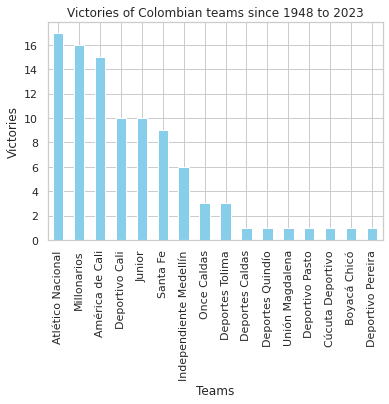

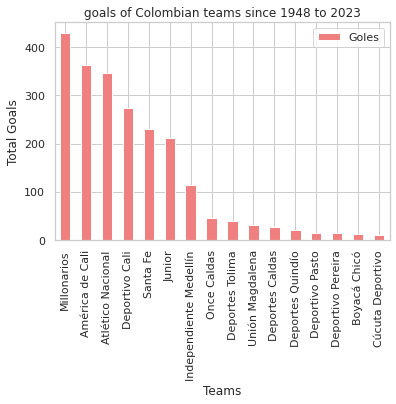

<Figure size 720x432 with 0 Axes>

In [50]:
# Plotting

team_frequency_plot = team_frequency.plot(kind='bar', color='skyblue')
team_frequency_plot.set_title('Victories of Colombian teams since 1948 to 2023')
team_frequency_plot.set_xlabel('Teams')
team_frequency_plot.set_ylabel('Victories')

# Plot for total goals
total_goals_plot = total_goals.plot(kind='bar', x='Campeon', y='Goles', color='lightcoral')

# Setting the title, x-axis label, and y-axis label
total_goals_plot.set_title('goals of Colombian teams since 1948 to 2023')
total_goals_plot.set_xlabel('Teams')
total_goals_plot.set_ylabel('Total Goals')

# Hide axes ticks

# Show the plot
plt.figure(figsize=(10, 6))
plt.show()

In [17]:
merged_df = pd.merge(team_frequency_df, total_goals, on='Campeon', how='outer')

In [15]:
team_frequency_df = team_frequency.reset_index()
team_frequency_df.columns = ['Campeon', 'Frequency']

In [20]:
merged_df.head()

,Campeon,Frequency,Goles
0,Atlético Nacional,17,347
1,Millonarios,16,430
2,América de Cali,15,363
3,Deportivo Cali,10,273
4,Junior,10,211


In [34]:
import seaborn as sns  # Import seaborn for improved styling
import numpy as np
from scipy.stats import linregress

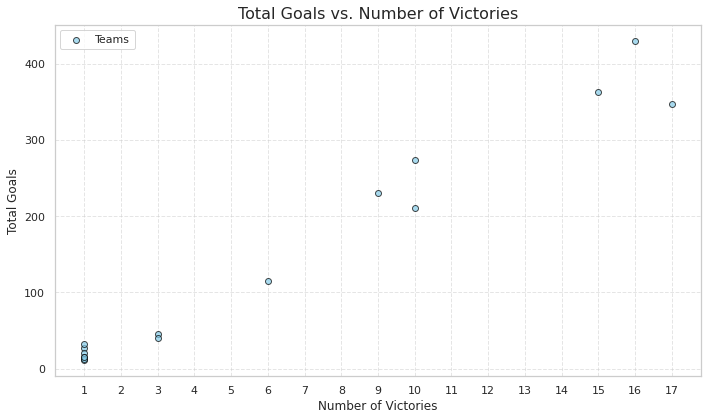

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Frequency'], merged_df['Goles'], color='skyblue', marker='o', edgecolors='black', linewidths=1, alpha=0.7,  label='Teams')
plt.title('Total Goals vs. Number of Victories', fontsize=16)
plt.xlabel('Number of Victories', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.xticks(range(1, len(merged_df['Frequency']) + 2)) 

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Improve spacing between plot elements
plt.show()

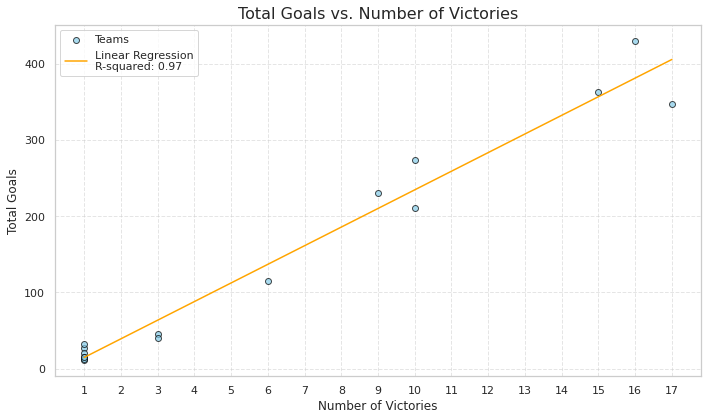

In [47]:
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Frequency'], merged_df['Goles'])
line = slope * merged_df['Frequency'] + intercept
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Frequency'], merged_df['Goles'], color='skyblue', marker='o', edgecolors='black', linewidths=1, alpha=0.7, label='Teams')
plt.title('Total Goals vs. Number of Victories', fontsize=16)
plt.xlabel('Number of Victories', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.xticks(range(1, len(merged_df['Frequency']) + 2)) 
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Improve spacing between plot elements
# Plot the regression line
plt.plot(merged_df['Frequency'], line, color='orange', label=f'Linear Regression\nR-squared: {r_value**2:.2f}')

plt.title('Total Goals vs. Number of Victories', fontsize=16)
plt.xlabel('Number of Victories', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()


In [22]:
print(merged_df)

                   Campeon  Frequency  Goles
0        Atlético Nacional         17    347
1              Millonarios         16    430
2          América de Cali         15    363
3           Deportivo Cali         10    273
4                   Junior         10    211
5                 Santa Fe          9    231
6   Independiente Medellín          6    115
7              Once Caldas          3     45
8          Deportes Tolima          3     40
9          Deportes Caldas          1     27
10        Deportes Quindío          1     21
11         Unión Magdalena          1     32
12         Deportivo Pasto          1     15
13        Cúcuta Deportivo          1     11
14            Boyacá Chicó          1     13
15       Deportivo Pereira          1     15
